<div style="background-color: #00224D; border-style: solid;  border-width: 10px;   text-align: center;" >

<ul>
<li> <a href="#introduction">Introduction</a><br><br>
<li> <a href="#ImportData">Import Data </a><br><br>
<li> <a href="#EDA">Exploratory Data Analysis (EDA) </a><br><br>
<li> <a href="#Visualization">Visualization</a><br><br>
<li> <a href="#Modling">Modling</a><br><br>
<li> <a href="#submission">Submission</a><br><br>
</ul>


<style>
a:link, a:visited {
  background-color: #F45050;
  border-color: #F9D949;
  padding: 15px 25px;
  text-align: center;
  display: inline-block;
  border-style: solid;  
  border-width: 10px;
  border-radius: 5px;
  font-size:25px;
  color:"red";
}

</style>



<a id='introduction'></a>
<div style="background-color: #0802A3; border-style: solid;  border-width: 15px;">
<h1> Introduction</h1>

<style>
h1 {
  text-align: center;
  color: #FF4B91;


}
</style>

<div style="background-color: #00224D; border-style: solid;  border-width: 10px;   text-align: center;" >


<p>Hi, in this competion i will try to predict the Rings i will try to use three model(Linear Regression, Decision Tree,Random Forest) and i will see what is better and make the model with it and also i will do some visualization</p>

<a id='ImportData'></a>
<div style="background-color: #0802A3; border-style: solid;  border-width: 15px;">
<h1> Import Data</h1>

<style>
h1 {
  text-align: center;
  color: #FF4B91;


}
</style>

In [2]:
import pandas as pd
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split

C:\Users\marwa\AppData\Local\Temp\ipykernel_13764\1246206954.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
df_test  = pd.read_csv("test.csv")
df_train  = pd.read_csv("train.csv")
df_sample = pd.read_csv("sample_submission.csv")


In [4]:
df_train.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [5]:
df_test.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,90615,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,90616,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,90617,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,90618,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,90619,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [6]:
df_sample.head()

,id,Rings
0,90615,10
1,90616,10
2,90617,10
3,90618,10
4,90619,10


<a id='EDA'></a>
<div style="background-color: #0802A3; border-style: solid;  border-width: 15px;">
<h1> Exploratory Data Analysis (EDA)</h1>

<style>
h1 {
  text-align: center;
  color: #FF4B91;


}
</style>

In [7]:
df_train.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
df_train.describe()

,id,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
count,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000,90615.000000
mean,45307.000000,0.517098,0.401679,0.135464,0.789035,0.340778,0.169422,0.225898,9.696794
std,26158.441658,0.118217,0.098026,0.038008,0.457671,0.204428,0.100909,0.130203,3.176221
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,22653.500000,0.445000,0.345000,0.110000,0.419000,0.177500,0.086500,0.120000,8.000000
50%,45307.000000,0.545000,0.425000,0.140000,0.799500,0.330000,0.166000,0.225000,9.000000
75%,67960.500000,0.600000,0.470000,0.160000,1.067500,0.463000,0.232500,0.305000,11.000000
max,90614.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [9]:
df_train2 = df_train.drop(columns=['id']) # droping the id column

In [10]:
df_train2.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [11]:
df_train2["Sex"].unique()

array(['F', 'I', 'M'], dtype=object)

In [12]:
def categorical_to_num(df,columns_):
    label_encoder = preprocessing.LabelEncoder()
    df[columns_] = label_encoder.fit_transform(df[columns_])

categorical_to_num(df_train2,"Sex")

In [13]:
df_train2["Sex"].unique()

array([0, 1, 2])

In [14]:
df_train2.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,0,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,1,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,2,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,1,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


<a id='Visualization'></a>
<div style="background-color: #0802A3; border-style: solid;  border-width: 15px;">
<h1> Visualization</h1>

<style>
h1 {
  text-align: center;
  color: #FF4B91;


}
</style>

array([[<Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole weight'}>,
        <Axes: title={'center': 'Whole weight.1'}>],
       [<Axes: title={'center': 'Whole weight.2'}>,
        <Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>]], dtype=object)

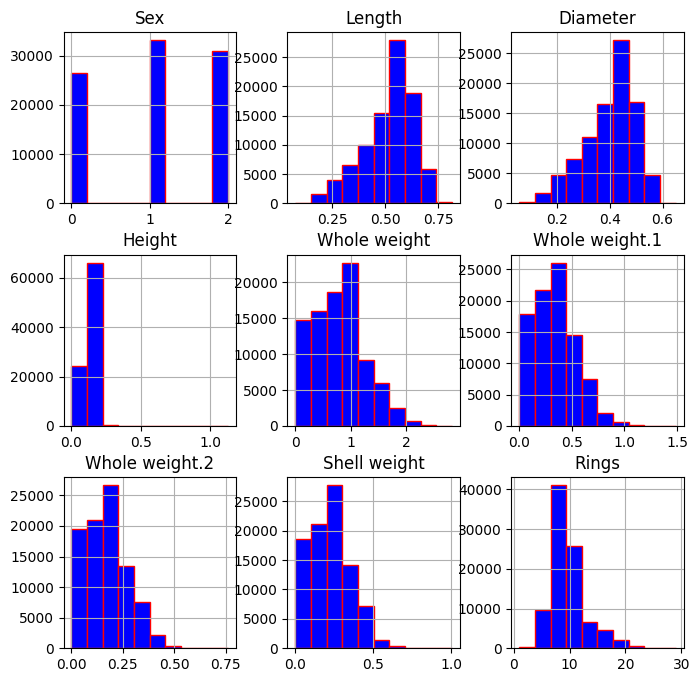

In [15]:
df_train2.hist(figsize=(8,8),facecolor='blue',edgecolor='red')

<Axes: >

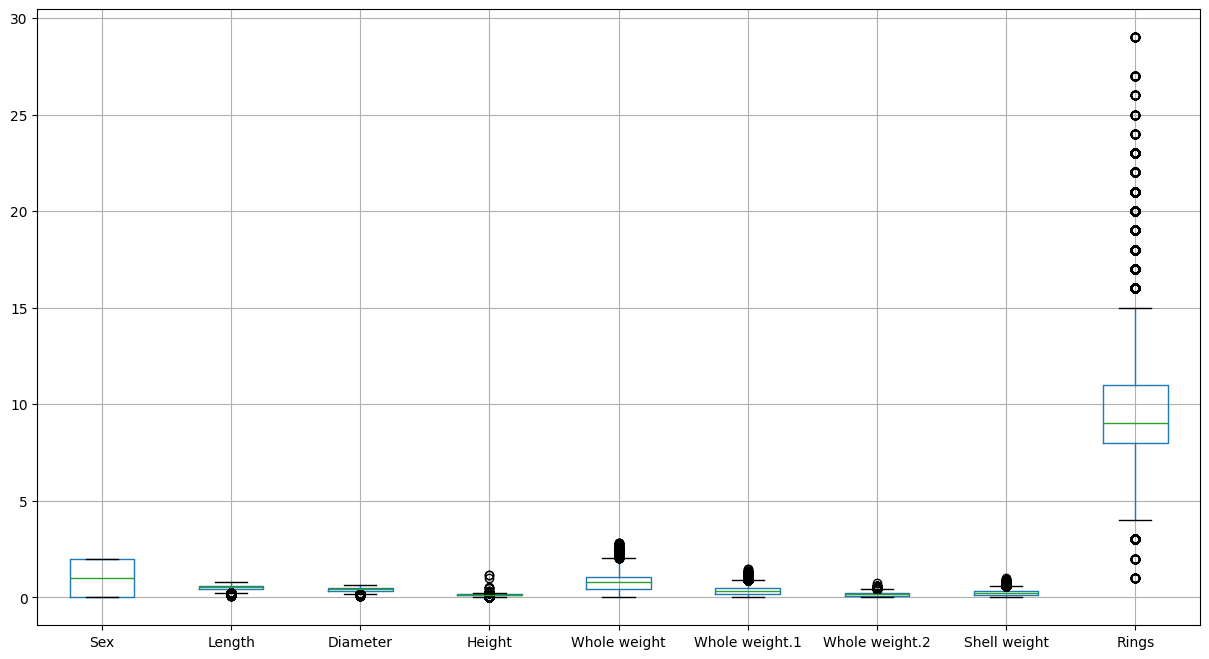

In [16]:
df_train2.boxplot(figsize=(15,8))

<Axes: >

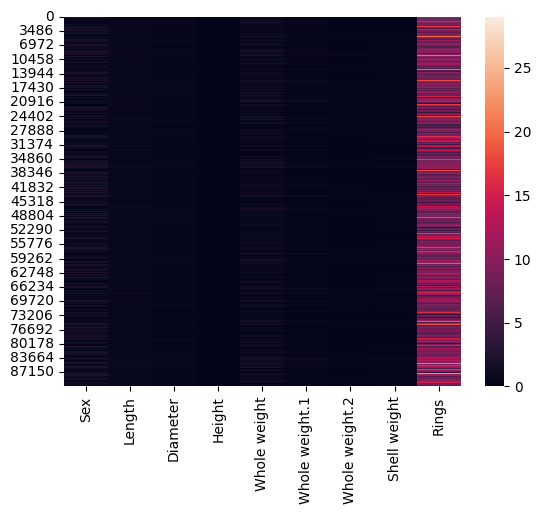

In [17]:
sn.heatmap(df_train2)

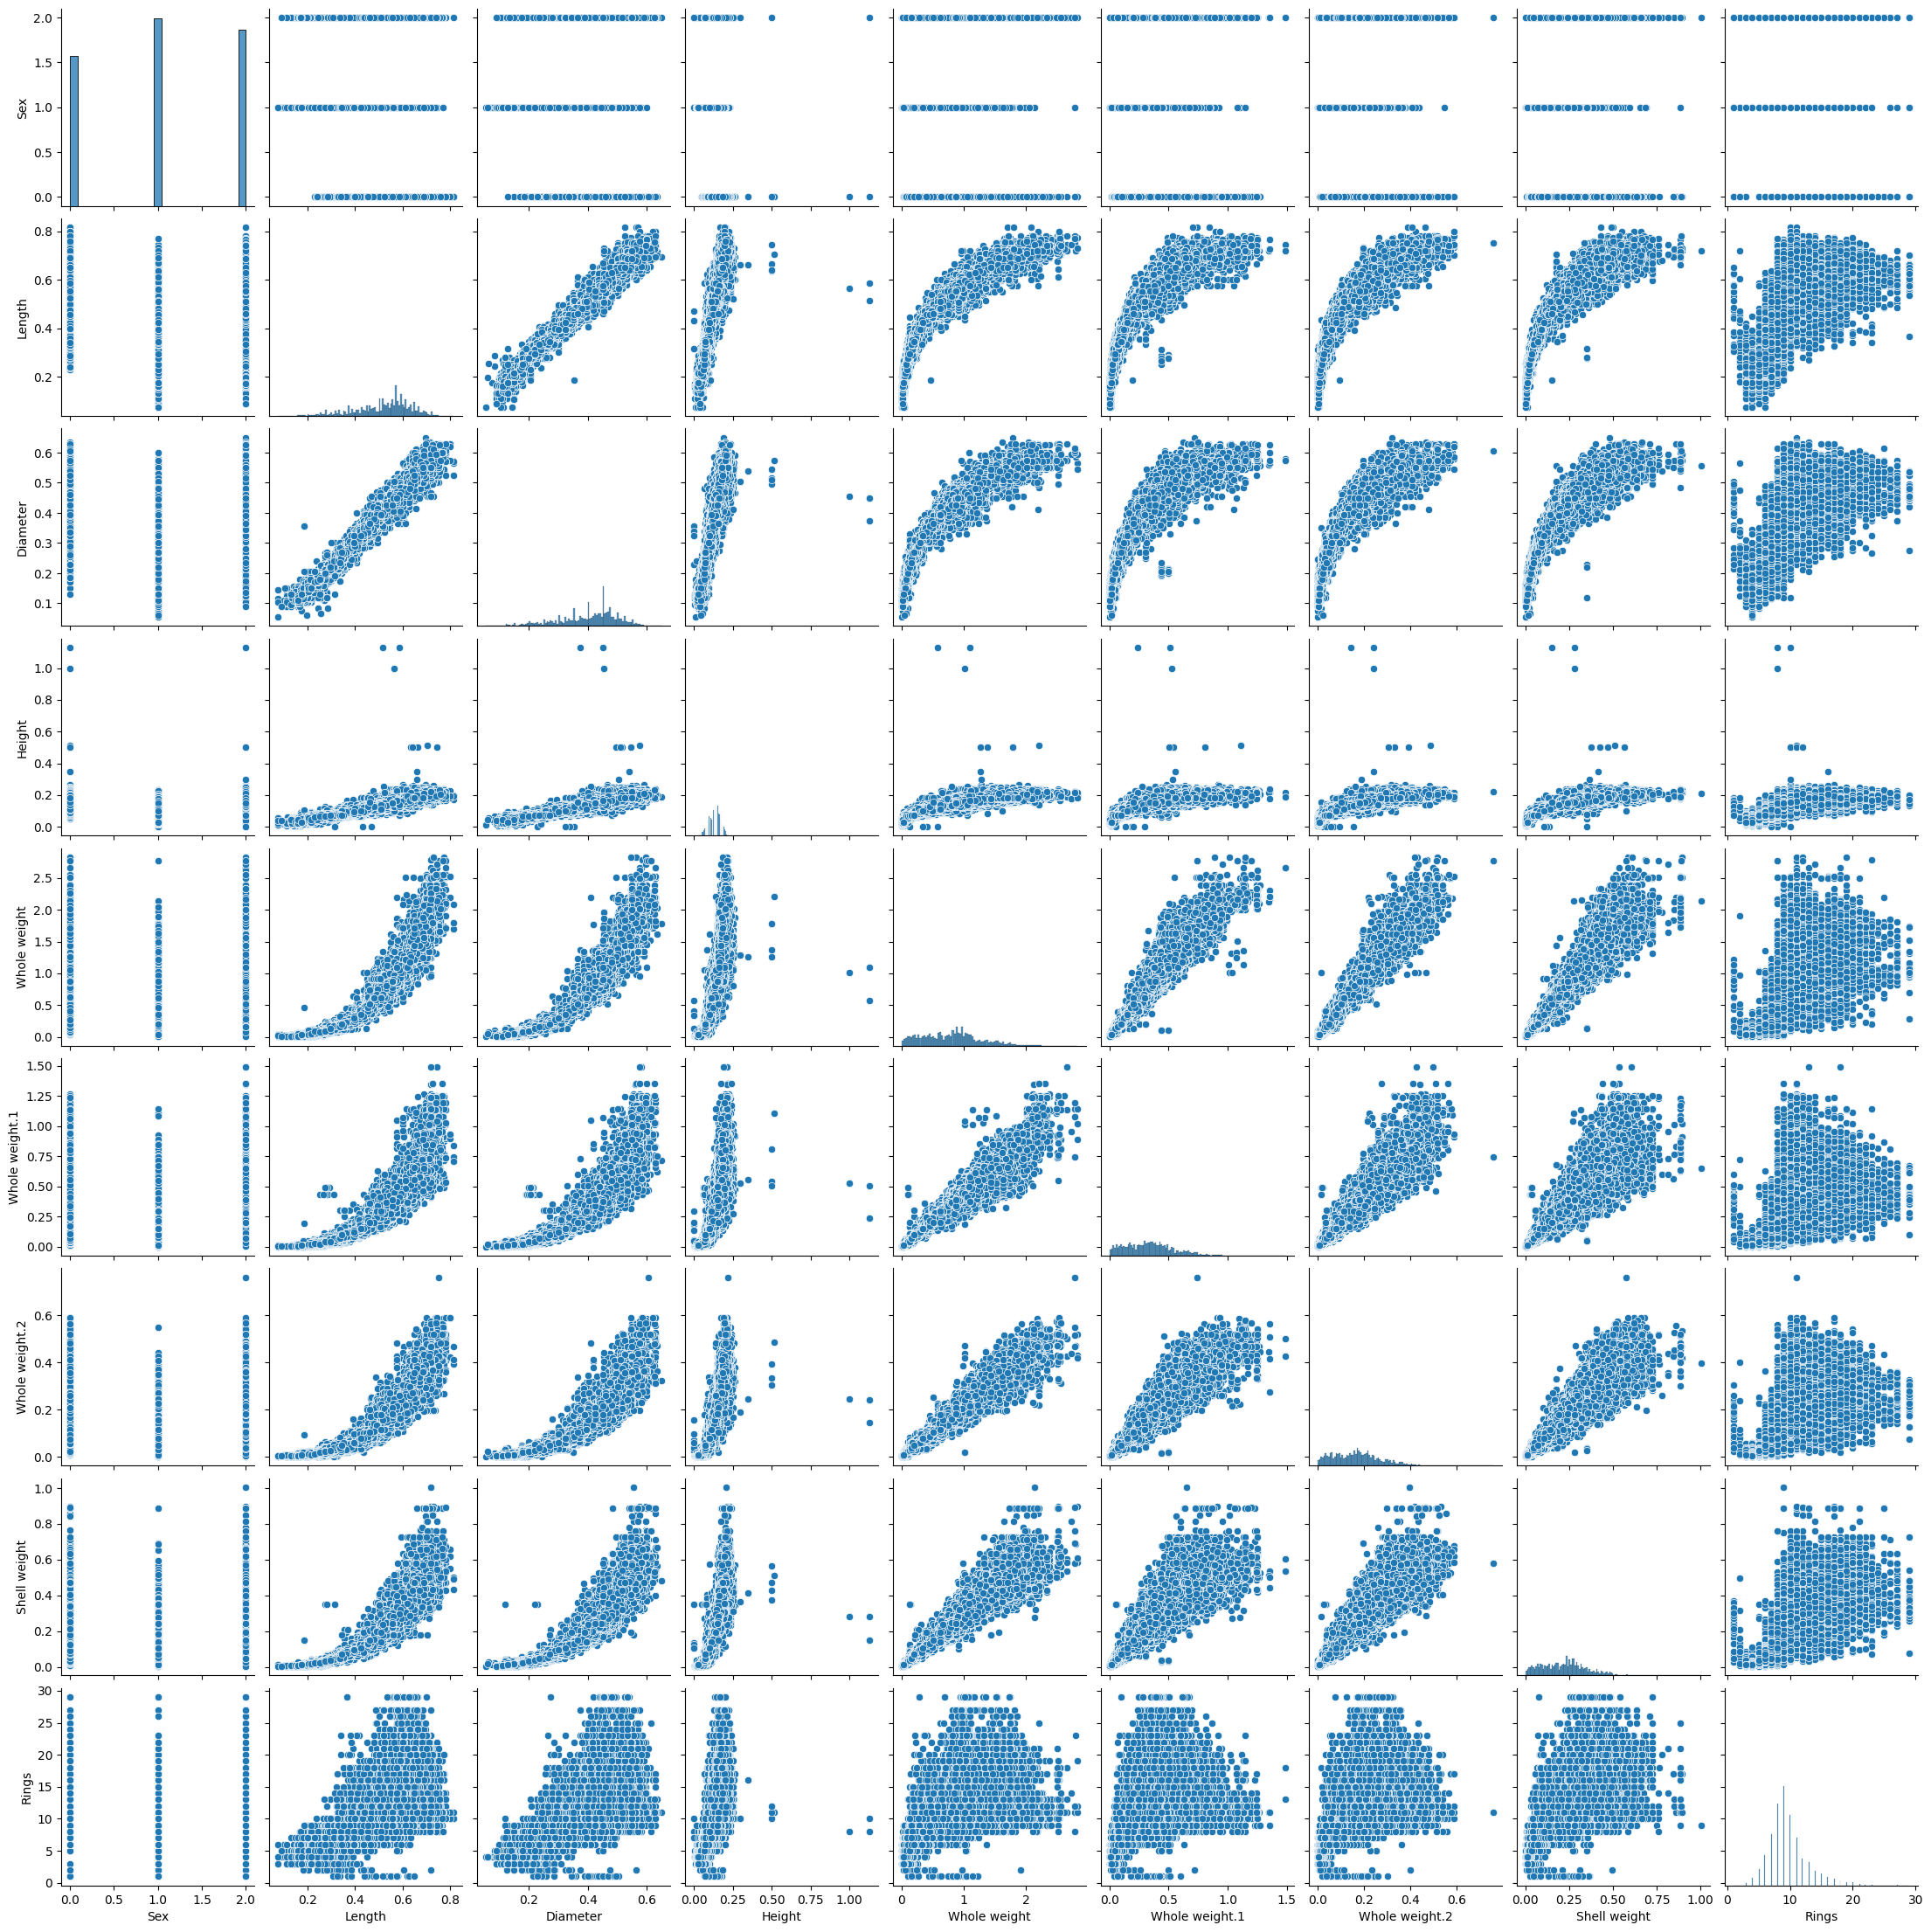

In [18]:
sn.pairplot(df_train2 ,diag_kind="hist")


In [19]:
def scatter_plot_view(X,Y,title=str,X_label=str,Y_label=str): 
    sn.scatterplot(x=X, y=Y, hue=df_train["Sex"])
    plt.title(f"{title} with Colored Sex",fontsize=25,color="red")
    plt.xlabel(X_label,fontsize=20,color="blue")
    plt.ylabel(Y_label,fontsize=20,color="blue")
    plt.grid(True)


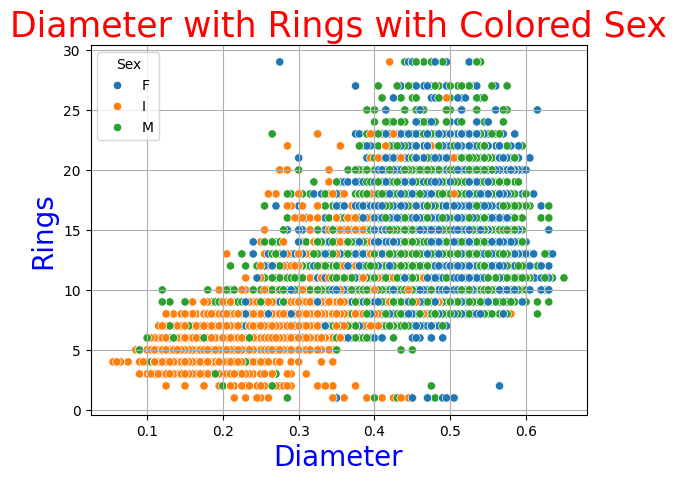

In [20]:
scatter_plot_view(df_train2["Diameter"],df_train2["Rings"],"Diameter with Rings","Diameter","Rings")

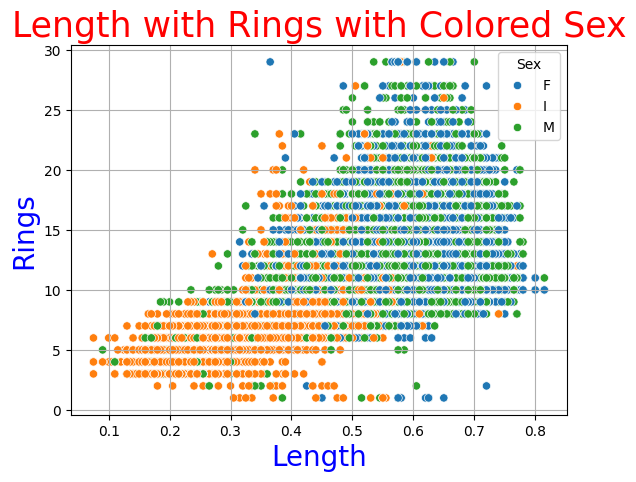

In [21]:
scatter_plot_view(df_train2["Length"],df_train2["Rings"],"Length with Rings","Length","Rings")

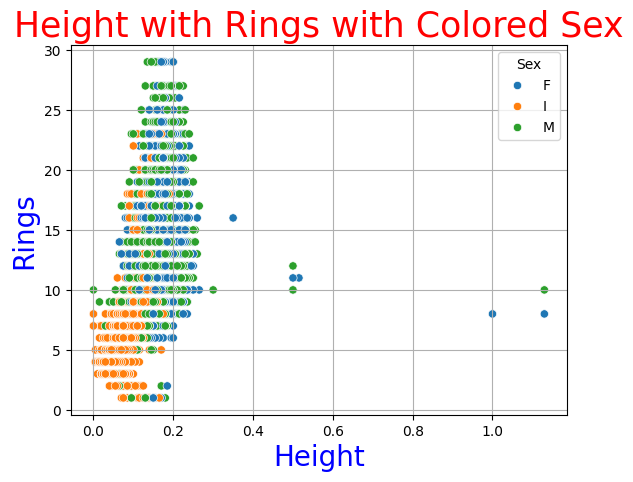

In [22]:
scatter_plot_view(df_train2["Height"],df_train2["Rings"],"Height with Rings","Height","Rings")

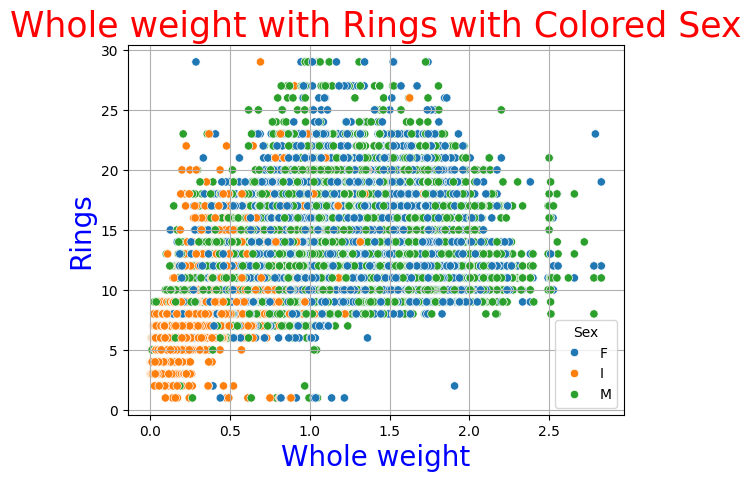

In [23]:
scatter_plot_view(df_train2['Whole weight'],df_train2["Rings"],"Whole weight with Rings","Whole weight","Rings")


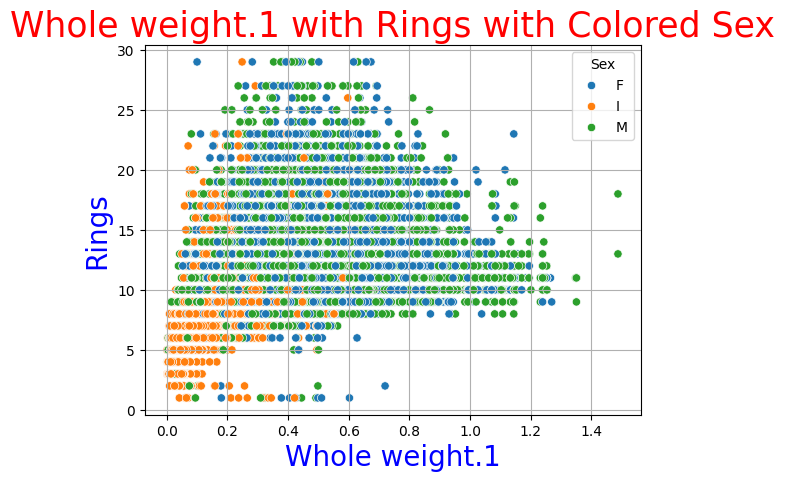

In [24]:
scatter_plot_view(df_train2['Whole weight.1'],df_train2["Rings"],"Whole weight.1 with Rings","Whole weight.1","Rings")


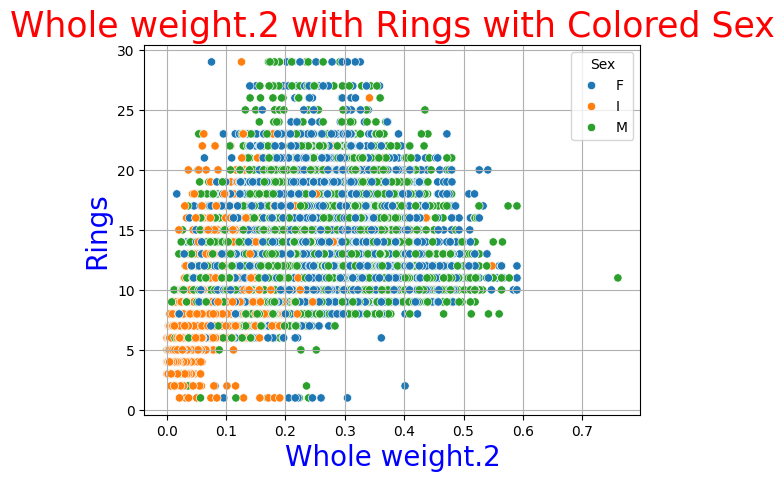

In [25]:
scatter_plot_view(df_train2['Whole weight.2'],df_train2["Rings"],"Whole weight.2 with Rings","Whole weight.2","Rings")


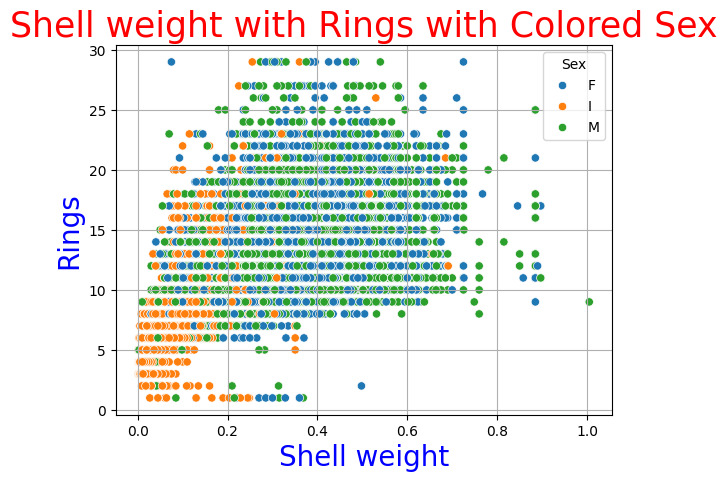

In [26]:
scatter_plot_view(df_train2['Shell weight'],df_train2["Rings"],"Shell weight with Rings","Shell weight","Rings")


<a id='Modling'></a>
<div style="background-color: #0802A3; border-style: solid;  border-width: 15px;">
<h1> Modling</h1>

<style>
h1 {
  text-align: center;
  color: #FF4B91;


}
</style>

In [27]:
X = df_train2.drop("Rings", axis=1)
y = df_train2["Rings"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [28]:
models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}, MSE: {mse:.4f}")


Model: LinearRegression, MSE: 4.0234
Model: DecisionTreeRegressor, MSE: 6.9775
Model: RandomForestRegressor, MSE: 3.4894


In [29]:
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)

RandomForestRegressor()

In [30]:
df_test2 = df_test.drop(columns=["id"])

In [31]:
df_test2.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,M,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,M,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,M,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,M,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,I,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050


In [32]:
categorical_to_num(df_test2,"Sex")
df_test2

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
0,2,0.645,0.475,0.155,1.2380,0.6185,0.3125,0.3005
1,2,0.580,0.460,0.160,0.9830,0.4785,0.2195,0.2750
2,2,0.560,0.420,0.140,0.8395,0.3525,0.1845,0.2405
3,2,0.570,0.490,0.145,0.8740,0.3525,0.1865,0.2350
4,1,0.415,0.325,0.110,0.3580,0.1575,0.0670,0.1050
...,...,...,...,...,...,...,...,...
60406,1,0.345,0.260,0.085,0.1775,0.0735,0.0265,0.0500
60407,0,0.525,0.410,0.145,0.8445,0.3885,0.1670,0.2050
60408,1,0.590,0.440,0.155,1.1220,0.3930,0.2000,0.2650
60409,0,0.660,0.525,0.190,1.4935,0.5885,0.3575,0.4350


In [38]:
rings_predict = RFR.predict(df_test2)


<a id='submission'></a>
<div style="background-color: #0802A3; border-style: solid;  border-width: 15px;">
<h1>Submission</h1>

<style>
h1 {
  text-align: center;
  color: #FF4B91;


}
</style>

In [66]:
test_df = pd.read_csv("test.csv")
predictions = rings_predict

missing_ids = test_df["id"].isin(predictions).sum() != len(test_df)
if missing_ids:
    print("Warning: Missing IDs in predictions or test data!")

submission_df = pd.DataFrame({"id": test_df["id"], "target": predictions})

if (submission_df["id"] != submission_df["id"].sort_values()).any():
    print("Warning: ID order might be mismatched!")

submission_df.to_csv("submission.csv", index=False)


In [67]:
submission_df

,id,target
0,90615,10.08
1,90616,9.96
2,90617,9.95
3,90618,11.31
4,90619,7.81
...,...,...
60406,151021,6.63
60407,151022,8.82
60408,151023,11.73
60409,151024,12.15
